Expectation: A working solution where the learned functions (for each training dataset) using Linear Regression is close to the training data points.



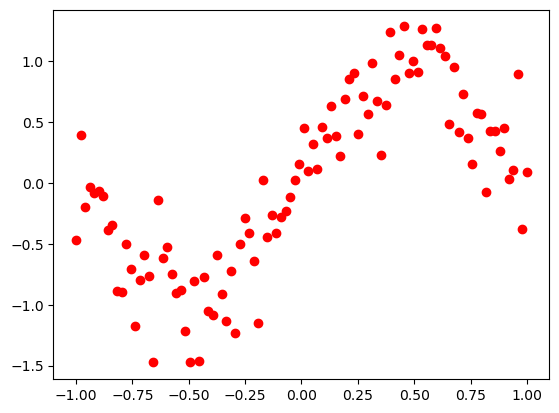

In [87]:
#Linear Regression for general functions
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy.linalg as la

pi = math.pi

x = np.linspace(-1,1,100)

y = np.sin(2*pi*.5*x)+0.3*np.random.randn(x.size)
plt.plot(x, y, 'ro')

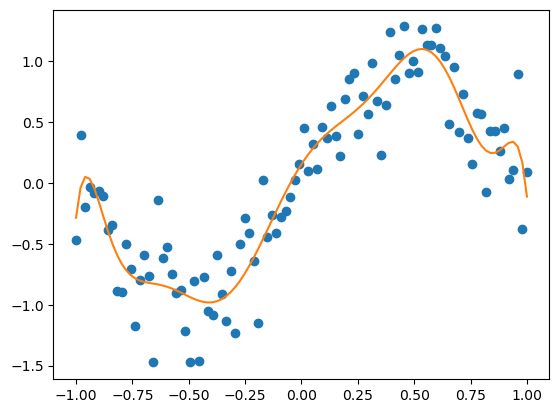

In [88]:
M = 10
X = []

for i in range(M+1):
  X.append(x**i)

X = np.array(X).T

theta = np.linalg.solve(X.T@X, X.T@y)

yhat = X@theta

plt.plot(x, y,'o', x, yhat)

(100, 4)


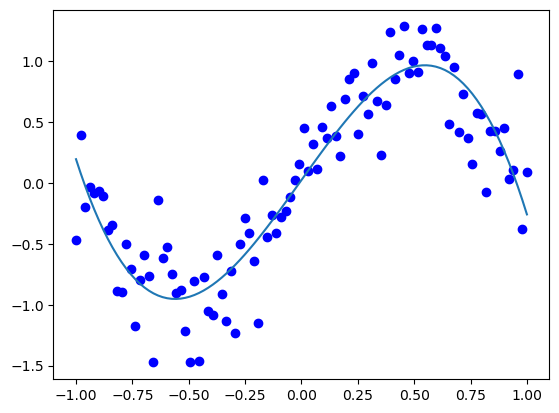

In [89]:
M = 3

X =[]

# for i in range(M+1):
#   X.append(x**i)

x = np.reshape(x, (100,1))
basis = np.arange(M+1)
basis = np.reshape(basis, (1, M+1))
X = x**basis

#X = np.array(X).T
print(X.shape)

# theat = inv(Xt X) (X.t y)
theta = np.linalg.inv(X.T @ X) @ (X.T @y)
#theta = np.linalg.solve(X.T @ X, X.T @y)

yhat = X@ theta

plt.plot(x,y,'bo', x, yhat)


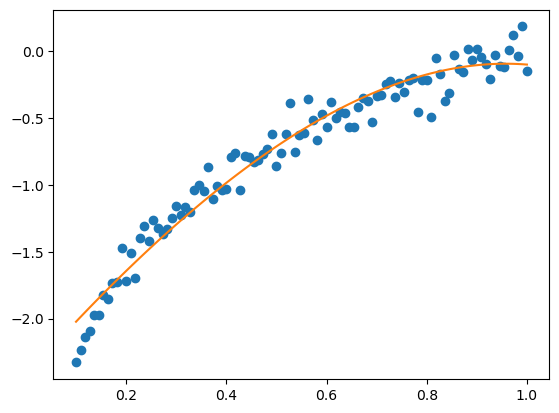

In [82]:
x0=np.linspace(0.1,1,100)
y0=np.log(x0)+0.1*np.random.randn(x0.size)

x1 = np.exp(x0)
X = np.column_stack((np.ones(x0.size), x0, x1))

theta = la.solve(X.T @ X, X.T @ y0)
y_hat = X @ theta

plt.plot(X[:, 1], y0, "o")
plt.plot(X[:, 1], y_hat, "-")
plt.show()

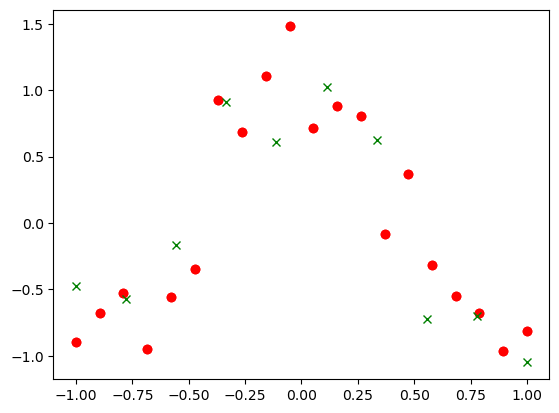

In [83]:
x0 = np.linspace(-1,1,20)

y0 = np.cos(pi*x0)+0.3*np.random.randn(x0.size)
plt.plot(x0,y0,'ro')

xv = np.linspace(-1,1,10)

yv = np.cos(pi*xv)+0.3*np.random.randn(xv.size)

plt.plot(x0, y0, 'ro', xv, yv, 'gx')

5.330298785964659
5.33966050490162
1.8395155477673588
1.8355825548187552
0.8312470081811666
0.788925354246414
0.8065618236068821
1.2665524631704843
1.2220141510027414
1.2755780071425764


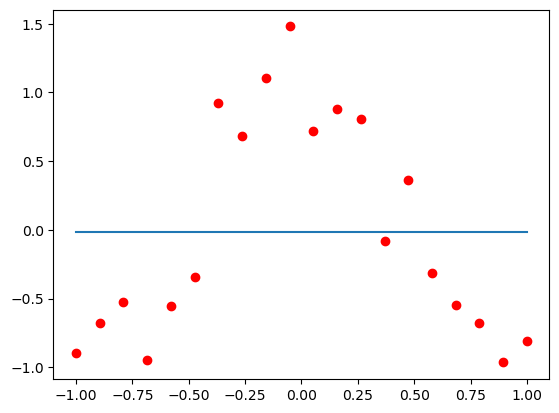

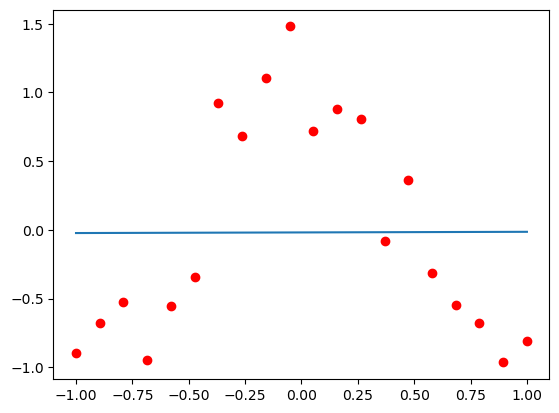

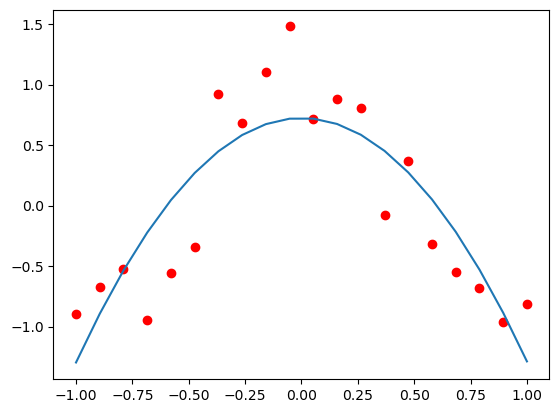

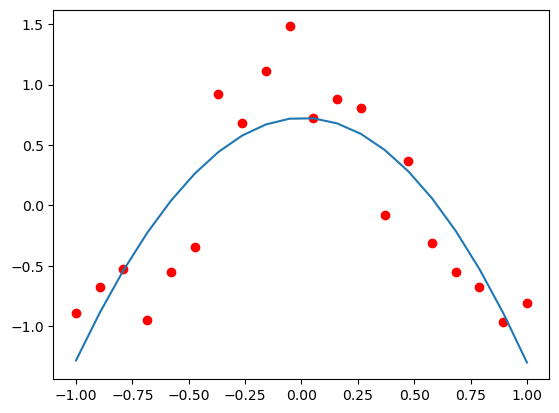

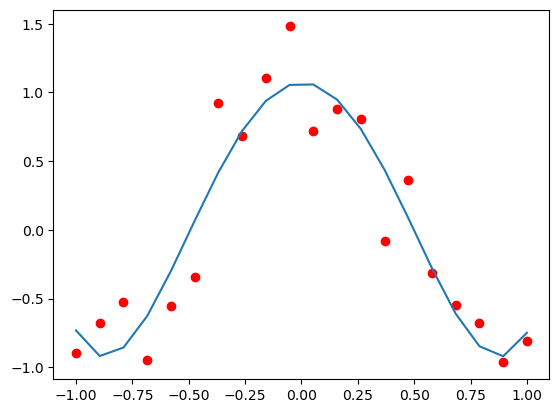

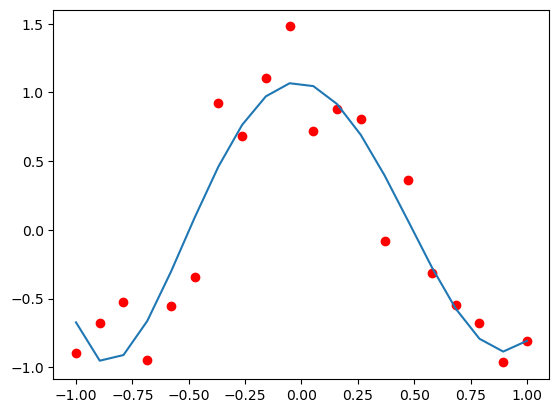

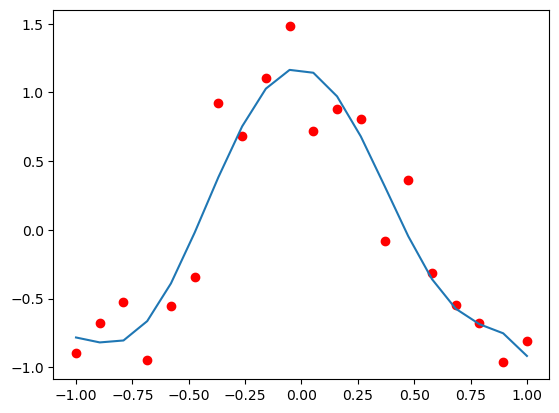

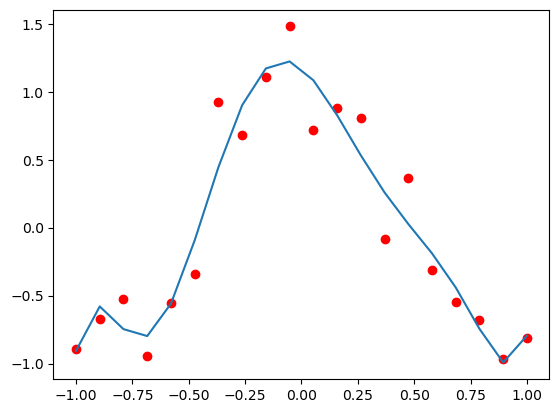

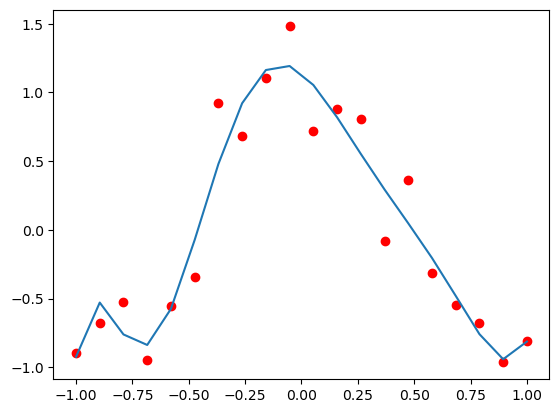

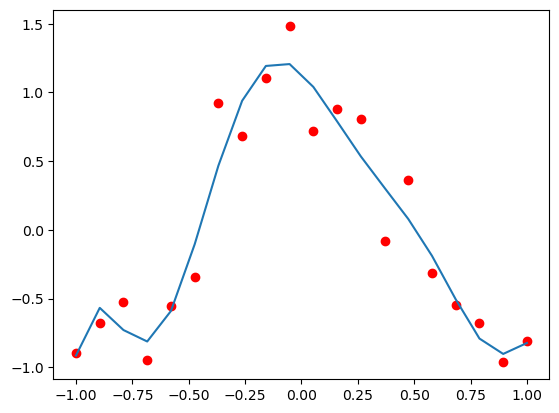

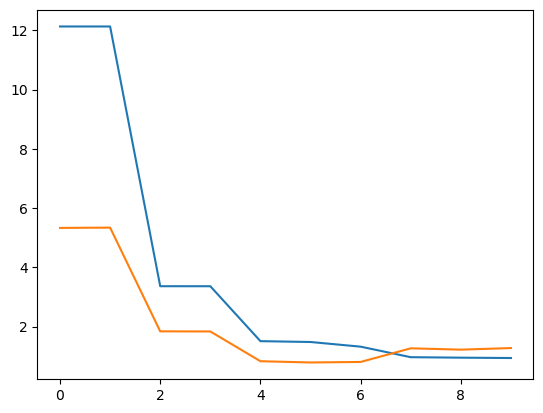

In [84]:
error_val = []
error_train = []
for M in range(10):
  X = []
  for i in range(M+1):
    X.append(x0**i)

  X = np.array(X).T
  theta = np.linalg.solve(X.T@X, X.T@y0)
  Xval = []
  for i in range(M+1):
    Xval.append(xv**i)

  Xval = np.array(Xval).T
  yhat_val = Xval@theta
  error = np.sum((yv-yhat_val.squeeze())**2)
  error_val.append(error)
  print(error)
  yhat = X@theta
  error = np.sum((y0-yhat.squeeze())**2)
  error_train.append(error)
  plt.figure()
  plt.plot(x0,y0, 'ro', x0, yhat)


plt.figure()
plt.plot(error_train)
plt.plot(error_val)

(20, 2)
(20, 3)
(20, 4)
(20, 5)
(20, 6)
(20, 7)
(20, 8)
(20, 9)
(20, 10)


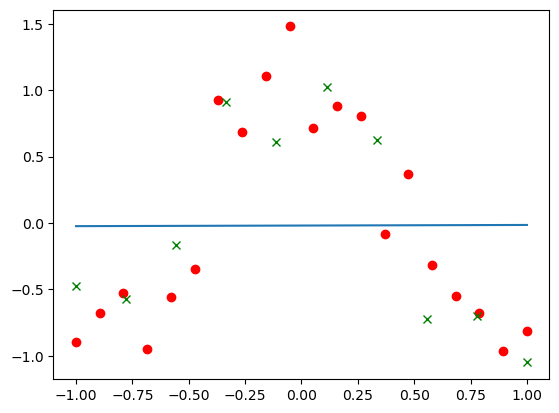

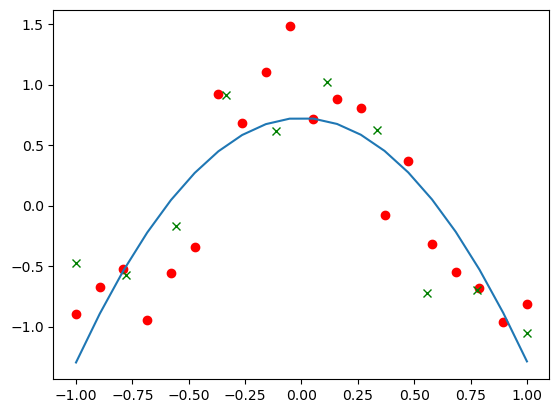

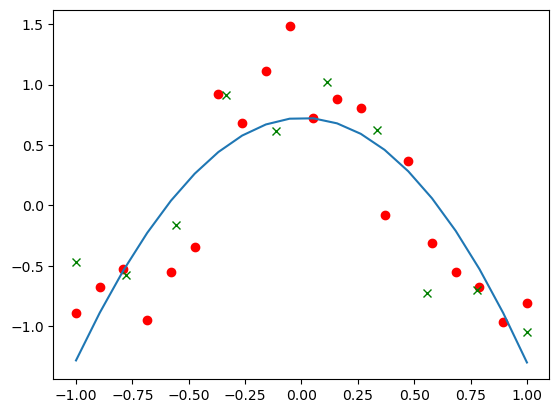

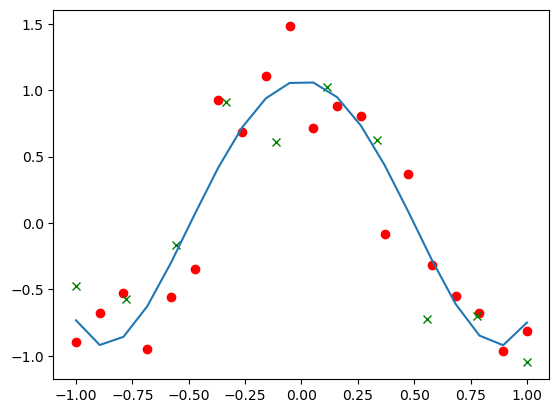

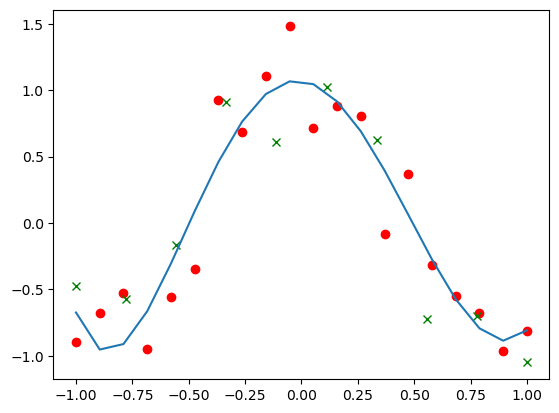

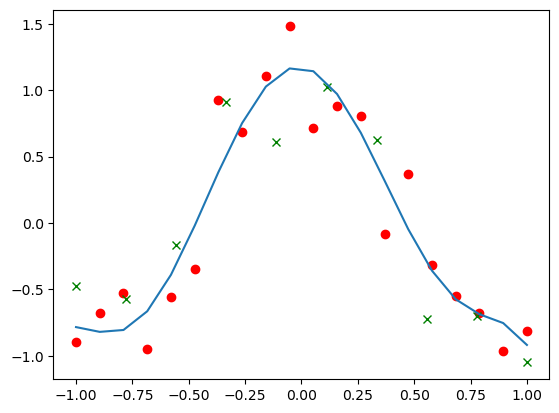

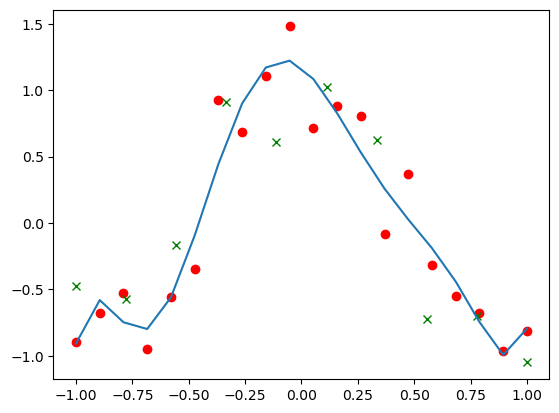

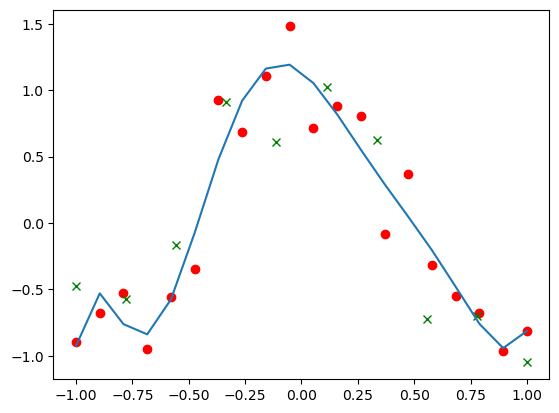

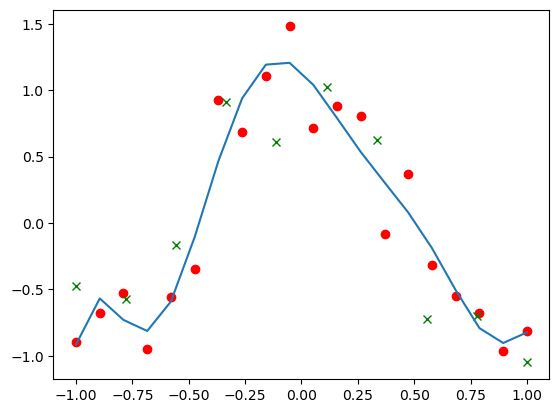

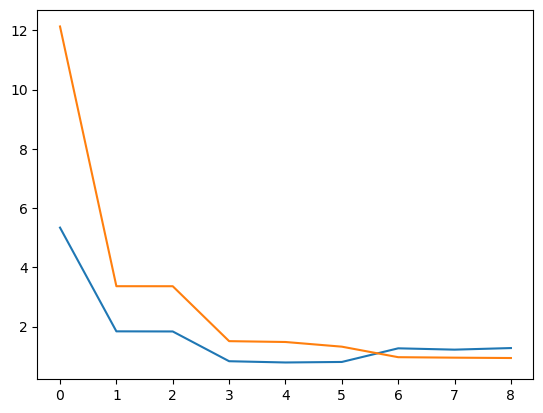

In [85]:
error_val= []
error_train = []
for M in range(1, 10):
  plt.figure()
  basis = np.arange(M+1)
  X = x0[:, np.newaxis]**basis[np.newaxis, :]
  print(X.shape)

  theta = np.linalg.solve(X.T@X, X.T@y0)
  yhat = X@theta

  plt.plot(x0,y0,'ro', xv, yv,'gx')
  plt.plot(x0,yhat)
  #val error
  Xv = xv[:, np.newaxis]**basis[np.newaxis, :]
  yhat_val = Xv@theta
  error = np.sum((yv-yhat_val)**2)
  error_t = np.sum((y0 - yhat)**2)

  error_val.append(error)
  error_train.append(error_t)

plt.figure()
plt.plot(error_val)   
plt.plot(error_train)

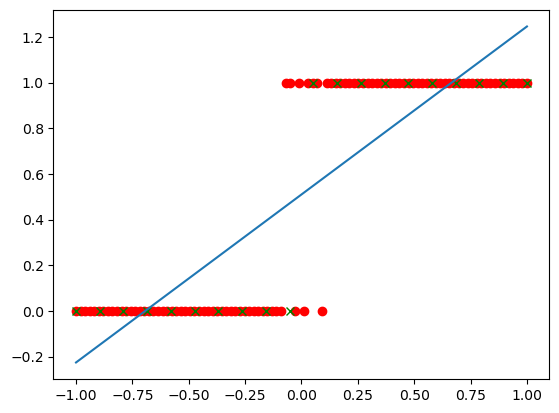

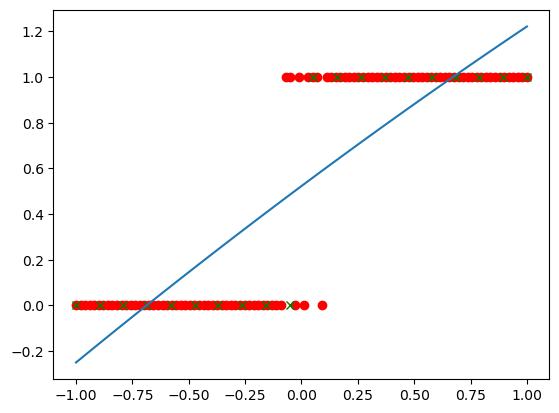

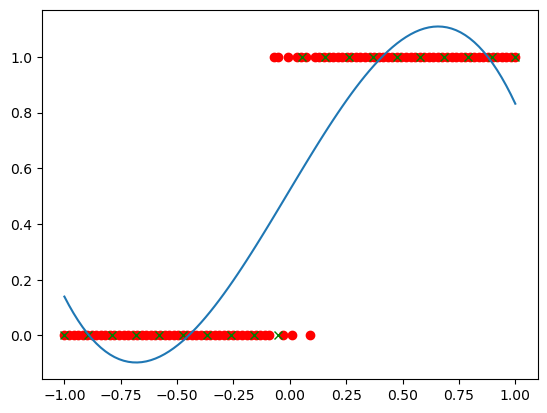

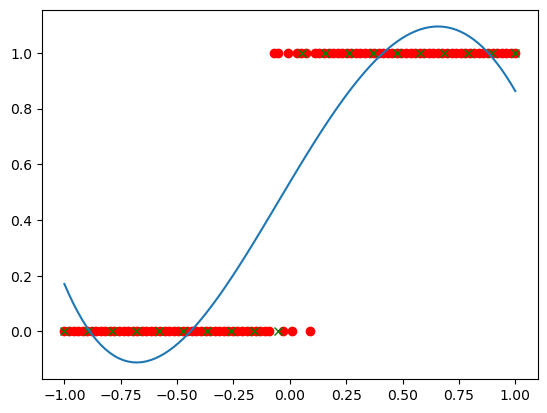

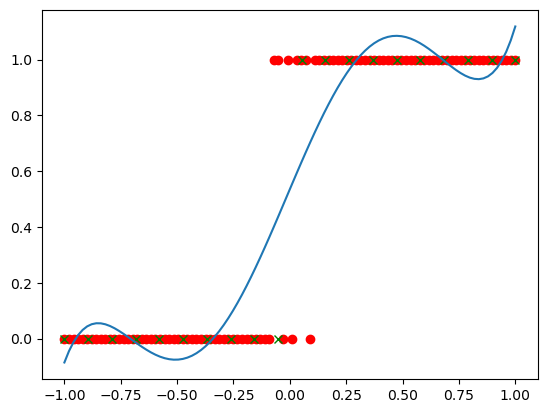

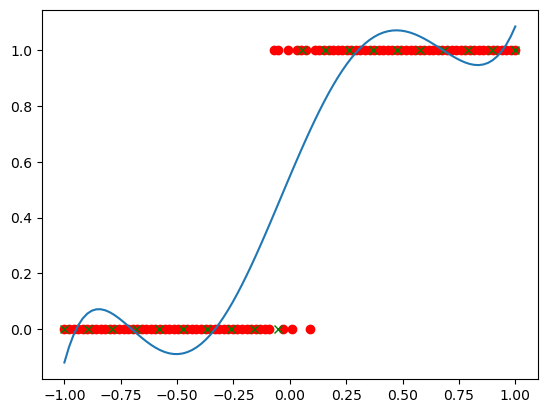

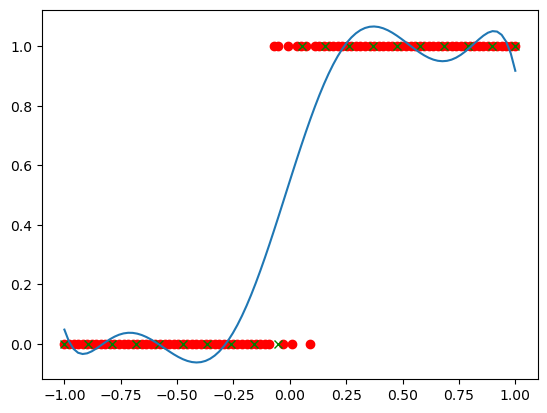

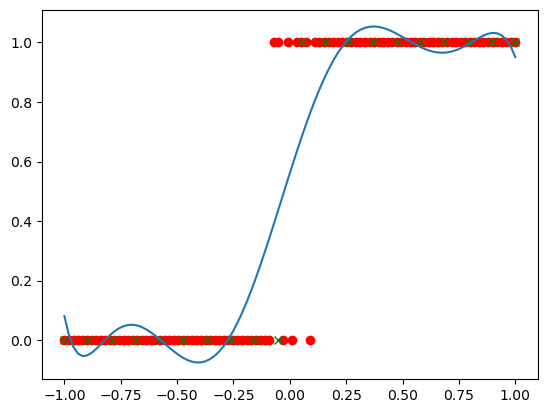

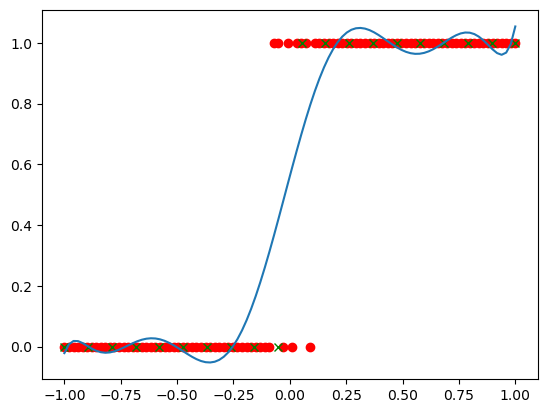

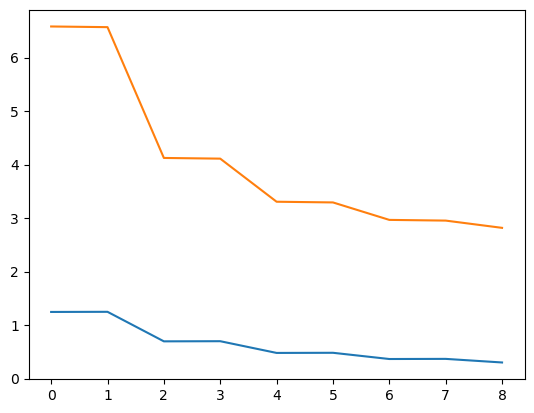

In [86]:
x = np.linspace(-1,1,100)

y = x>0+0.1*np.random.randn(x.size)

xv = np.linspace(-1,1,20)
yv = xv>0+0.1*np.random.randn(xv.size)

error_val = []
error_train = []


for M in range(1, 10):
    plt.figure()
    basis = np.arange(M+1)
    X = x[:, np.newaxis]**basis[np.newaxis, :]
    theta = np.linalg.solve(X.T@X, X.T@y)
    yhat = X@theta

    plt.plot(x, y,'ro', xv, yv,'gx')
    plt.plot(x, yhat)
    #val error
    Xv = xv[:, np.newaxis]**basis[np.newaxis, :]
    yhat_val = Xv@theta
    error = np.sum((yv-yhat_val)**2)
    error_t = np.sum((y - yhat)**2)

    error_val.append(error)
    error_train.append(error_t)

plt.figure()
plt.plot(error_val)   
plt.plot(error_train)

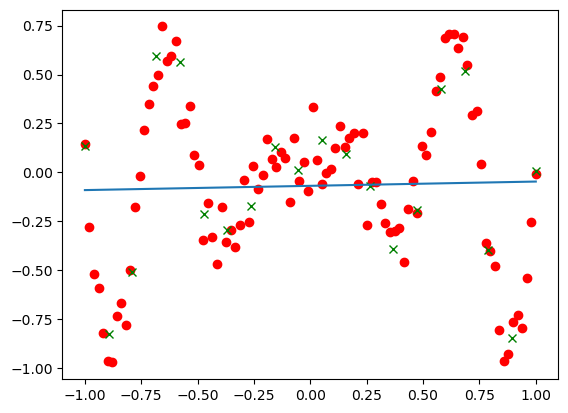

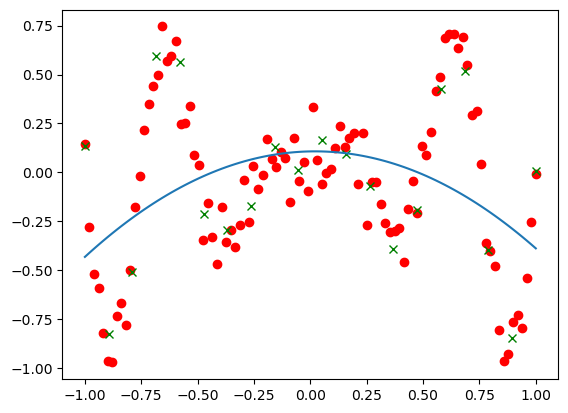

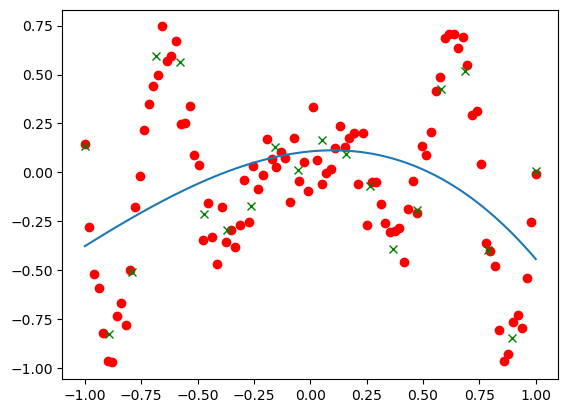

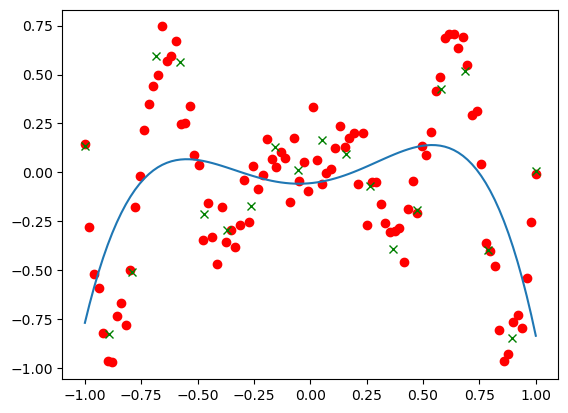

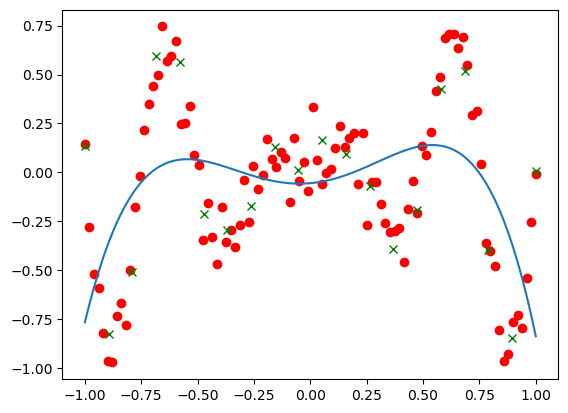

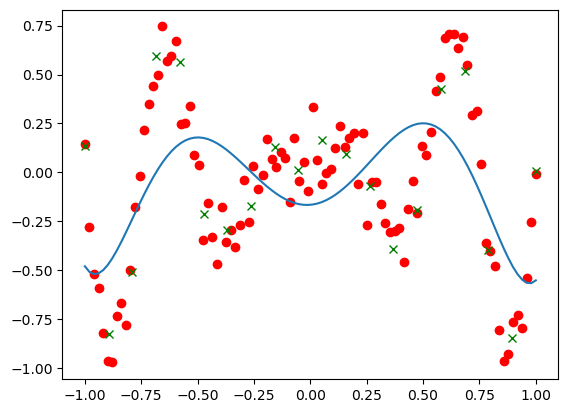

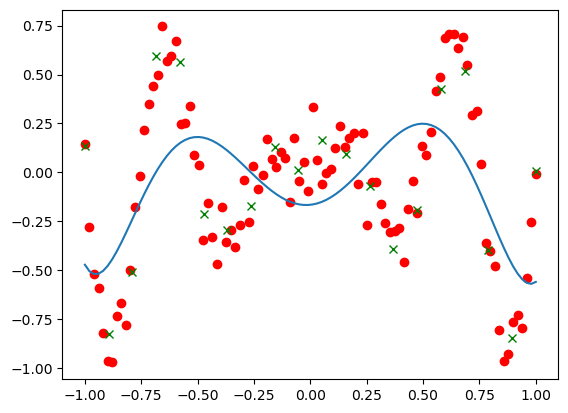

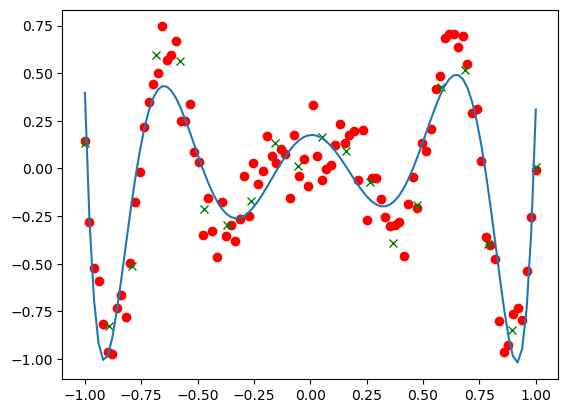

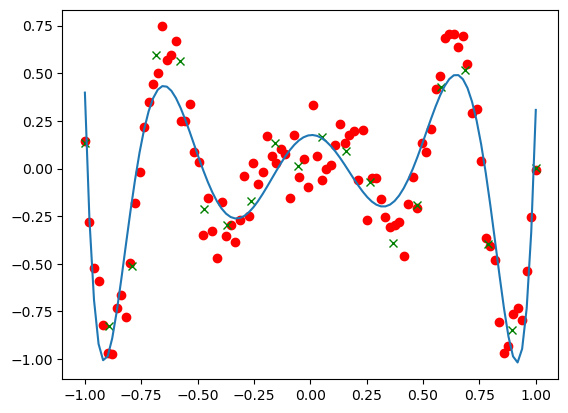

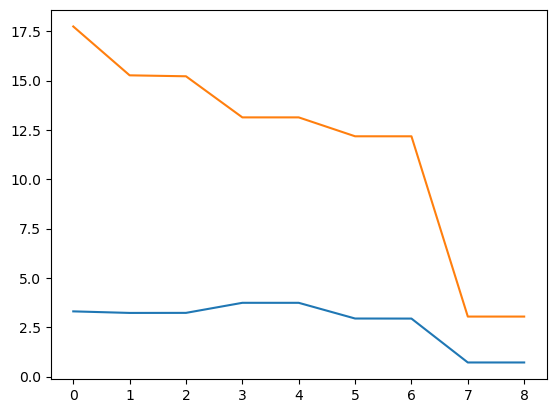

In [74]:
x = np.linspace(-1,1,100)
y = x*np.sin(2*3.14*2*x) + 0.1*np.random.randn(x.size)

xv = np.linspace(-1, 1, 20)
yv = xv*np.sin(2*3.14*2*xv) + 0.1*np.random.randn(xv.size)

error_val = []
error_train = []

for M in range(1, 10):
    plt.figure()
    basis = np.arange(M+1)
    X = x[:, np.newaxis]**basis[np.newaxis, :]
    theta = np.linalg.solve(X.T@X, X.T@y)
    yhat = X@theta

    plt.plot(x, y,'ro', xv, yv,'gx')
    plt.plot(x, yhat)
    #val error
    Xv = xv[:, np.newaxis]**basis[np.newaxis, :]
    yhat_val = Xv@theta
    error = np.sum((yv-yhat_val)**2)
    error_t = np.sum((y - yhat)**2)

    error_val.append(error)
    error_train.append(error_t)

plt.figure()
plt.plot(error_val)   
plt.plot(error_train)

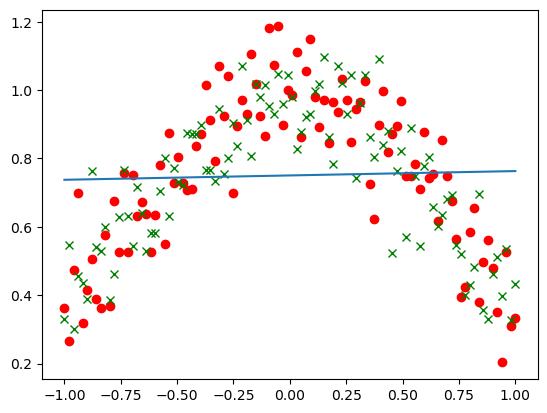

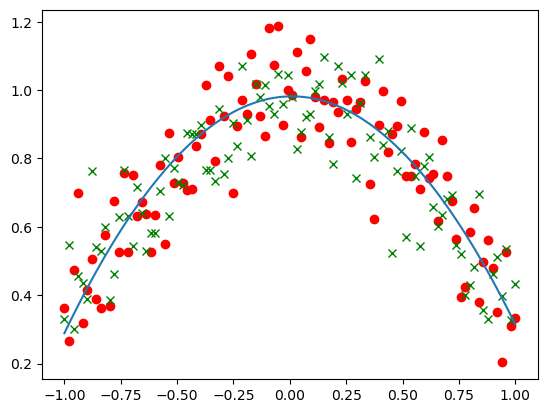

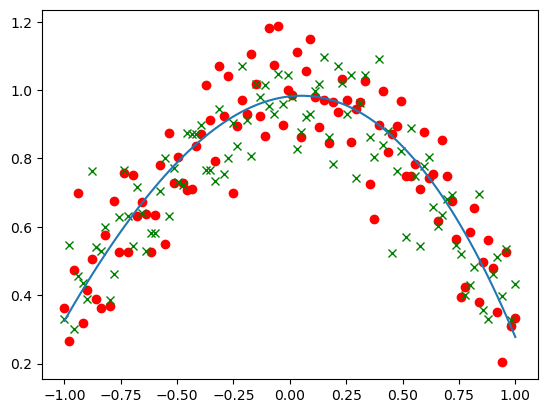

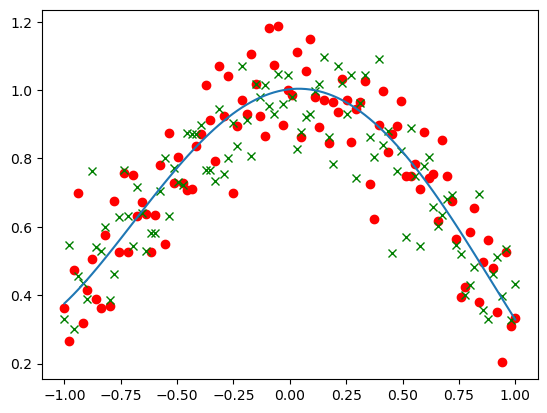

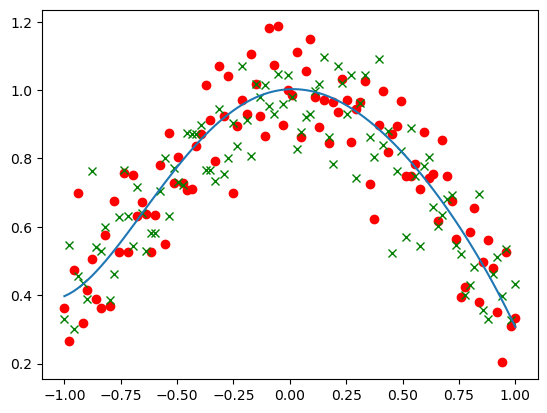

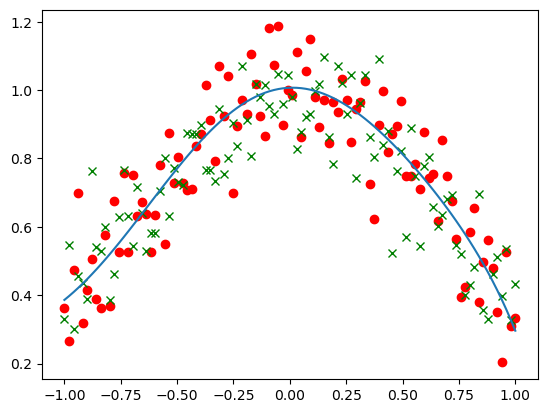

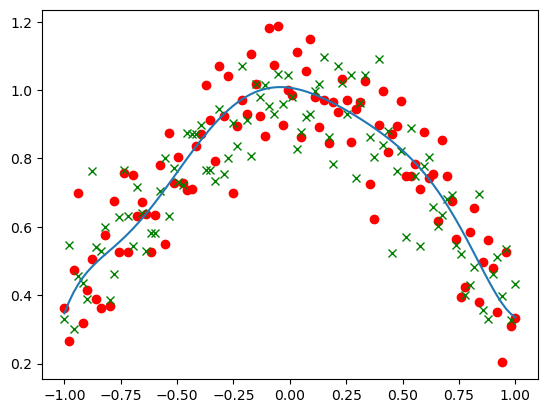

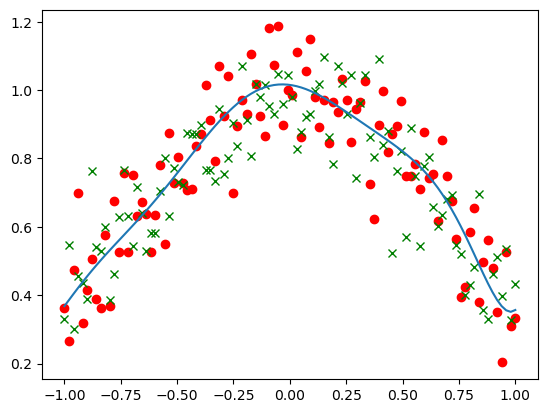

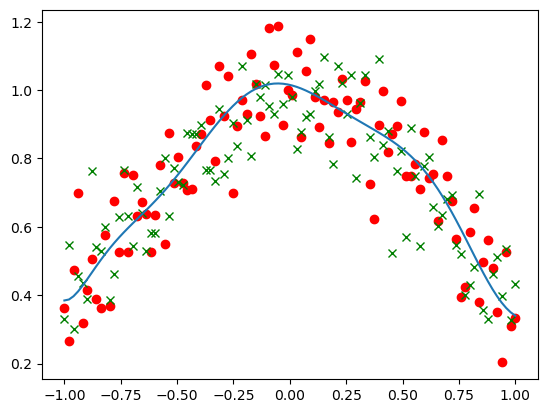

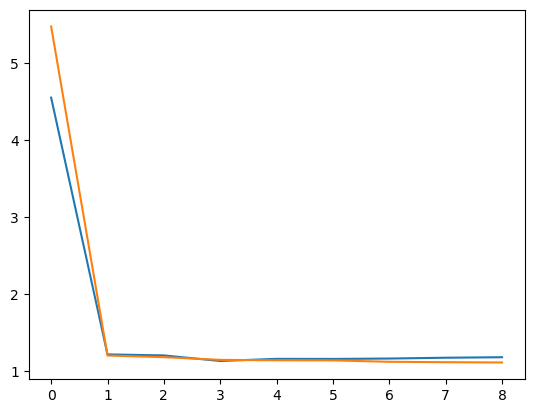

In [73]:
x = np.linspace(-1,1,100)
y = np.exp(-x**2)+0.1*np.random.randn(x.size)

xv = np.linspace(-1,1,100)
yv = np.exp(-x**2)+0.1*np.random.randn(xv.size)

error_val = []
error_train = []

for M in range(1, 10):
    plt.figure()
    basis = np.arange(M+1)
    X = x[:, np.newaxis]**basis[np.newaxis, :]
    theta = np.linalg.solve(X.T@X, X.T@y)
    yhat = X@theta

    plt.plot(x, y,'ro', xv, yv,'gx')
    plt.plot(x, yhat)
    #val error
    Xv = xv[:, np.newaxis]**basis[np.newaxis, :]
    yhat_val = Xv@theta
    error = np.sum((yv-yhat_val)**2)
    error_t = np.sum((y - yhat)**2)

    error_val.append(error)
    error_train.append(error_t)

plt.figure()
plt.plot(error_val)   
plt.plot(error_train)